## Image Recognition w. Python 

http://yann.lecun.com/exdb/mnist/

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting.



In [1]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -- sklearn modules 
from sklearn.model_selection import train_test_split   #- partition train/test split 
from sklearn.tree import DecisionTreeClassifier        #- create a decison tree 
from sklearn.ensemble import ExtraTreesClassifier      #- random trees 
from sklearn.ensemble import RandomForestClassifier    #- random forest classifier 

# -- we need these to make our pipelines 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# -- we need these to evaluate our models 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

# -- categorical encoders -- 
from category_encoders import *


# -- need this to render charts in notebook -- 
%matplotlib inline


## Read the Files in

Every image is made up of pixels and when these values are extracted using python, four values are obtained for each pixel (R,G,B,A). This is called the RGBA color space having the Red, Green, Blue colors and Alpha value respectively.

In python we use a library called PIL (python imaging Library). The modules in this library is used for image processing and has support for many file formats like png, jpg, bmp, gif etc. It comes with large number of functions that can be used to open, extract data, change properties, create new images and much more…

import the Image module of PIL into the shell:

from PIL import Image

create an image object and open the image for reading mode:

im = Image.open(‘myfile.png’, ‘ r’)

Use getdata() to extract the pixel values. this scans the image horizontally from left to right starting at the top-left corner. The values got from each pixel is then added into a list. Finally what we get is a list with each pixel value as a set of 4 values(R,G,B.A).

pix_val = list(im.getdata())

pix_val is the list that contains all the pixel values which can be printed to see those values But the list got is a list of sets and some times its needed to flatten the list for example if the list is like: [(123,124,145,120), (345,453,234,124),……] and the list that is needed is [123, 124, 145, 120, 345, 453, 234, 124….]  the command to flatten the list is:

pix_val_flat = [x for sets in pix_val for x in sets]

The following data has already been flattened into pixels 


In [62]:
#read train and test files
df = pd.read_csv('train.csv')
x_test = pd.read_csv('test.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df.shape

(42000, 785)

In [55]:
df['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [56]:
#generate training data from train_file
train, test = train_test_split(df,test_size=0.01)
print("train pct: {:2.2%}".format(train.shape[0]/df.shape[0]))
print("test  pct: {:2.2%}".format(test.shape[0]/df.shape[0]))


train pct: 99.00%
test  pct: 1.00%


Label: 9


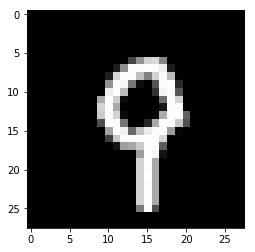

In [68]:
index=10
x_train, y_train=train.iloc[:,1:].values, train.iloc[:,0].values
print("Label: " + str(y_train[index]))
plt.imshow(x_train[index].reshape((28,28)),cmap='gray')
plt.show()

In [70]:
clf=RandomForestClassifier(n_estimators = 100, n_jobs=-1)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [88]:
pred_train= clf.predict(x_train)
pred_test = clf.predict(x_test)

In [ ]:
print("Model train Accuracy: " + str(accuracy_score(train['label'],pred_train)))
print("Model test  Accuracy: " + str(accuracy_score(test['label'],pred_test)))

In [ ]:
from sklearn.metrics import confusion_matrix
print("Validation Confusion Matrix: \n" + str(confusion_matrix(test['label'],pred_test)))

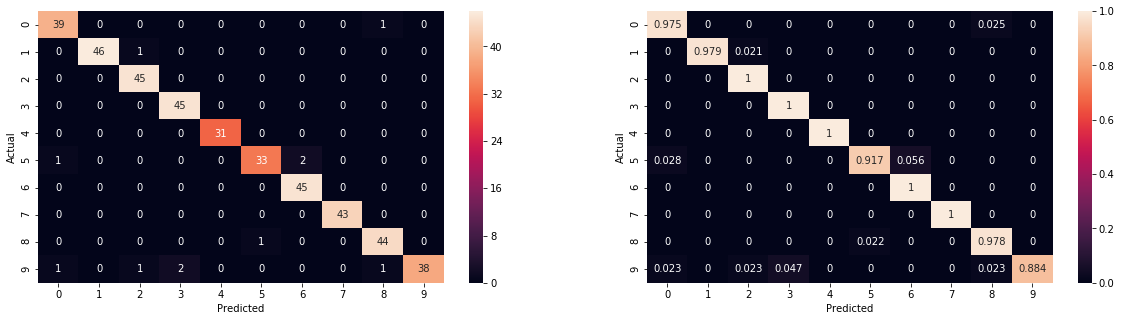

In [63]:
confusion_matrix = pd.crosstab(test['label'], pred_test,  rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_pct = pd.crosstab(test['label'], pred_test,  rownames=['Actual'], colnames=['Predicted'], normalize="index").round(3)
fig, (ax1, ax2, ) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='g',ax=ax1)
sns.heatmap(confusion_matrix_pct, annot=True, fmt='g', ax=ax2)

In [64]:
#test["pred"] = pred_test
#test[test["pred"] != test["label"]][["label","pred"]].head()

Label: 7
Pred : 7


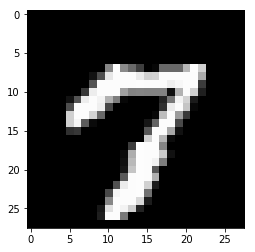

In [65]:
index=2
x_test, y_test=test.iloc[:,1:].values, test.iloc[:,0].values
print("Label: " + str(y_test[index]))
print("Pred : " + str(pred_test[index]))
plt.imshow(x_test[index].reshape((28,28)),cmap='gray')
plt.show()

In [66]:
def print_diff(idx):
    index=idx
    x_test, y_test=test.iloc[:,1:].values, test.iloc[:,0].values
    print("Label: " + str(y_test[index]))
    print("Pred : " + str(pred_test[index]))
    plt.imshow(x_test[index].reshape((28,28)),cmap='gray')
    plt.show()

for i,v in enumerate(y_test):
    if i < 10:
        if v != pred_test[i]:
            print_diff(i)
        

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
def model_confusion_matrix(model, model_name):
    test['income_pred'] = model.predict(test[numeric_features + categorical_features])
     
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
    
    print(model_name + " - Training confusion Matrix")
    confusion_matrix = pd.crosstab(train['income'], train['income_pred'],  rownames=['Actual'], colnames=['Predicted'])
    confusion_matrix_pct = pd.crosstab(train['income'], train['income_pred'], normalize="all", rownames=['Actual'], colnames=['Predicted']).round(3)
    sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax1)
    sns.heatmap(confusion_matrix_pct, annot=True, fmt='g', ax=ax2)
    
    #plt.show()
    #fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
    print(model_name + " - Testing confusion Matrix")
    confusion_matrix = pd.crosstab(test['income'], test['income_pred'],  rownames=['Actual'], colnames=['Predicted'])
    confusion_matrix_pct = pd.crosstab(test['income'], test['income_pred'], normalize="all", rownames=['Actual'], colnames=['Predicted']).round(3)


    sns.heatmap(confusion_matrix, annot=True, fmt='g', ax=ax3)
    sns.heatmap(confusion_matrix_pct, annot=True, fmt='g', ax=ax4)
    
    ax1.title.set_text('Training Counts')
    ax2.title.set_text('Training Pct')
    ax3.title.set_text('Testing Counts')
    ax4.title.set_text('Testing Pct')
    
    plt.show()